In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import thor.visualize as visualize
import thor.config as config
import thor.analyze as analyze

import visualize as vis
import utils


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
style = "paper"
mpl_style = visualize.visualize.styles[style]

In [4]:
base_local = config.get_outputs_directory()
analysis_directory = base_local / "runs/gridrad_severe/analysis"

In [ ]:
# Aggregate data across runs
dfs, metadata = utils.aggregate_runs()

In [81]:
# Load aggregated runs
dfs, metadata = utils.load_aggregated_runs()

In [ ]:
# Basic statistics
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    vis.windrose(dfs, analysis_directory)
    plt.show()

In [ ]:
utils.relabel_all(dfs)

In [5]:
longest_directory = analysis_directory / "longest_paths"

In [91]:
utils.aggregate_relabelled(metadata, longest_directory)

In [6]:
dfs, metadata = utils.load_aggregated_runs(longest_directory)

In [7]:
analysis_options = analyze.mcs.AnalysisOptions()
dfs = utils.recalculate_duration_check(dfs, analysis_options)

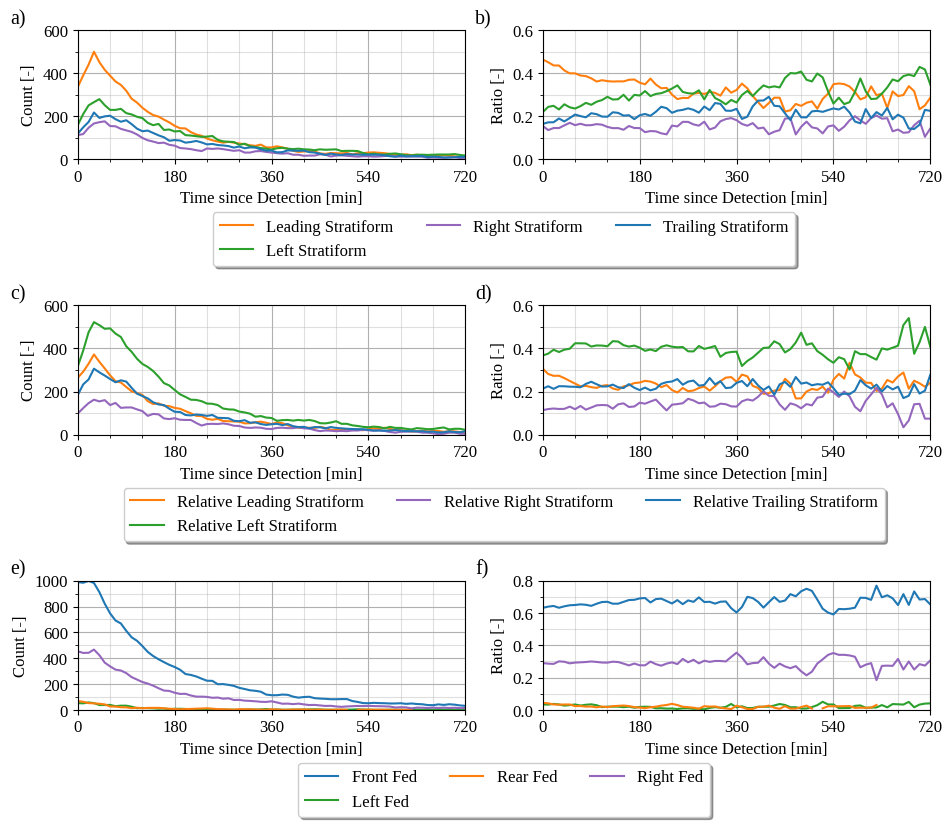

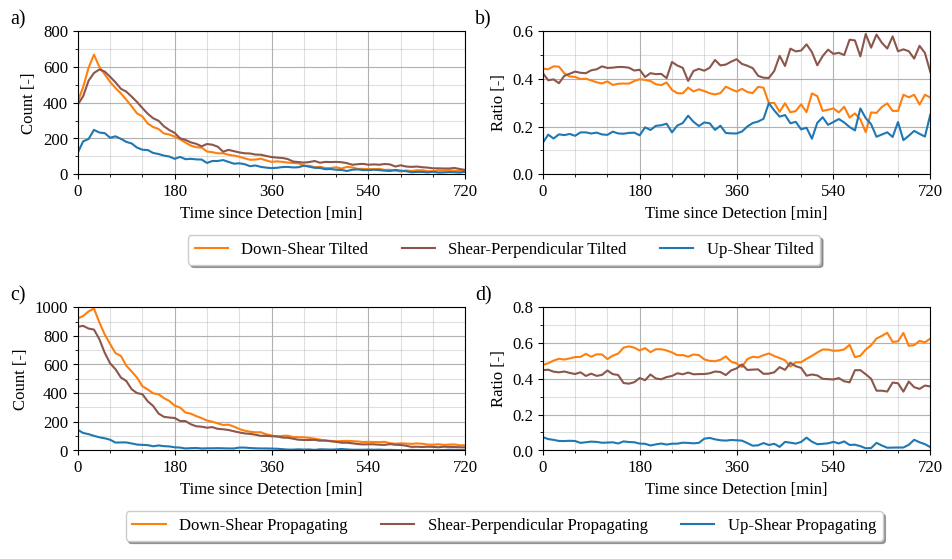

In [8]:
# Interesting! The offsets produce the big spikes!
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    args = [dfs["classification"], dfs["quality"], analysis_directory]
    vis.plot_classification_evolution(*args)
    plt.show()

In [ ]:
# with plt.style.context(mpl_style), visualize.visualize.set_style(style):
#     vis.parent_graph(parent_graph)

2024-11-12 09:50:38,351 - visualize - INFO - Calculating minutes.
2024-11-12 09:50:52,945 - visualize - INFO - Plotting.


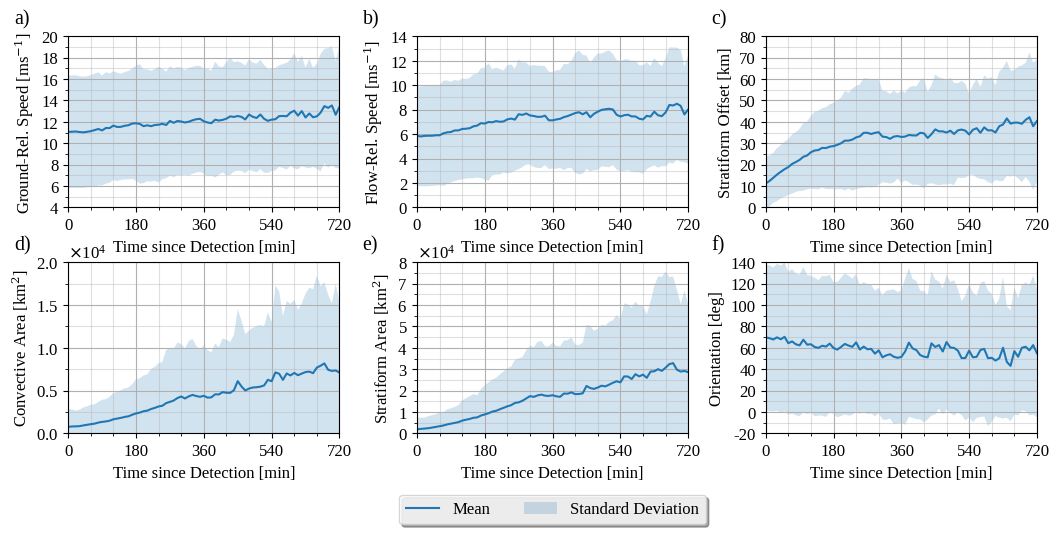

In [9]:
with plt.style.context(mpl_style), visualize.visualize.set_style(style):
    vis.plot_attribute_evolution(dfs, analysis_directory)
    plt.show()